Because of high tuition costs at state and private universities,
enrollments at community colleges have increased dramatically in recent years. The
following data show the enrollment for Jefferson Community College for the nine most
recent years:

a. Construct a time series plot. What type of pattern exists in the data?

b. Use simple linear regression analysis to find the parameters for the line that mini-
mizes MSE for this time series.

c. What is the forecast for year 10?

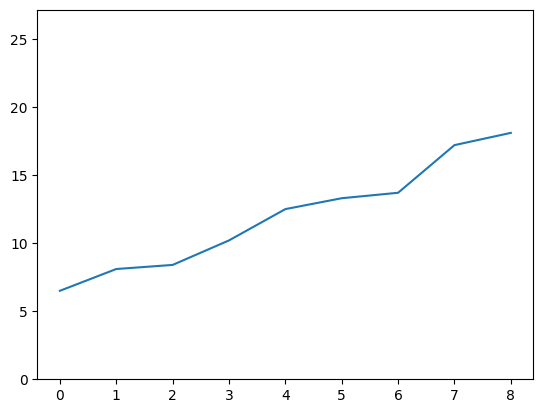

In [19]:
year = [2001,2002,2003,2004,2005,2006,2007,2008,2009 ]
period = [1,2,3,4,5,6,7,8,9]
data = [6.5,8.1,8.4,10.2,12.5,13.3,13.7,17.2,18.1]

import matplotlib.pyplot as plt

plt.ylim(bottom = 0, top = max(data)*1.5)
plt.plot(data)

$eq = B_0 + B_1 * Period$

In [20]:
from docplex.mp.model import Model

m = Model()

b_0 = m.continuous_var(name = 'Intercept')
b_1 = m.continuous_var(name = 'Slope')

# for i in period:
#     m.add_constraint(b_0 + b_1 * i == data[i-1])
    

mse = []
for i in period:
    mse.append(((b_0 + b_1 * i) - data[i-1])**2)

m.minimize(sum(mse))

In [21]:
m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops to factor    = 5
Tried aggregator 1 time.
QP Presolve added 0 rows and 2 columns.
Reduced QP has 2 rows, 4 columns, and 5 nonzeros.
Reduced QP objective Q matrix has 2 nonzeros.
Presolve time = 0.01 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops t

docplex.mp.solution.SolveSolution(obj=3.42733,values={Intercept:4.71667,..

In [22]:
m.print_solution()

objective: 3.427
status: OPTIMAL_SOLUTION(2)
  Intercept=4.717
  Slope=1.457
